dep : département<br>
sexe : sexe des personnes (0 : tout le monde, 1 : homme, 2: femme OU l'inverse)<br>
jour : jour du bilan<br>
hosp : Nb de pers actuellement hospitalisées<br>
rea : Nb de pers actuellement en services de réanimation ou soins intensifs<br>
HospConv : Nb de pers en hospitalisations conventionnelles (hospitalisation pas en réanimation). HospConv + rea = hosp<br>
SSR_USLD : Nb de pers en soins de suite et réadaptation ou unité de soin longue durée<br>
autres : Nb de pers dans d'autres types de services<br>
rad : retour à domicile<br>
dc : décès<br>

In [6]:
# Imports modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/donnees-hospitalieres-covid19-2021-09-20-19h05.csv', sep=';')

In [4]:
data.info()

# Beaucoup de NaNs dans HospConv, SSR_URL, autres

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168360 entries, 0 to 168359
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dep       168360 non-null  object 
 1   sexe      168360 non-null  int64  
 2   jour      168360 non-null  object 
 3   hosp      168360 non-null  int64  
 4   rea       168360 non-null  int64  
 5   HospConv  58255 non-null   float64
 6   SSR_USLD  58255 non-null   float64
 7   autres    58255 non-null   float64
 8   rad       168360 non-null  int64  
 9   dc        168360 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 12.8+ MB


In [5]:
data.jour = pd.to_datetime(data.jour)

In [20]:
data

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6
...,...,...,...,...,...,...,...,...,...,...
168355,976,0,2021-09-20,8,2,6.0,0.0,0.0,1289,133
168356,976,1,2021-09-20,4,1,3.0,0.0,0.0,584,78
168357,976,2,2021-09-20,4,1,3.0,0.0,0.0,684,54
168358,978,0,2021-09-20,0,0,0.0,0.0,0.0,0,1


In [24]:
# création d'un df avec les données seulement pour tous les sexes
data_sexe_all = data[data.sexe ==0]

# suppression de la colonne sexe
data_sexe_all = data_sexe_all.drop('sexe', axis=1)

# groupby pour avoir les données pour tous les départements = France entière
data_sexe_all_fr = data_sexe_all.groupby('jour').sum()

In [25]:
data_sexe_all_fr

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2020-03-18,2972,771,0.0,0.0,0.0,816,218
2020-03-19,4073,1002,0.0,0.0,0.0,1180,327
2020-03-20,5226,1297,0.0,0.0,0.0,1587,450
2020-03-21,5900,1453,0.0,0.0,0.0,1811,525
2020-03-22,6954,1674,0.0,0.0,0.0,2117,632
...,...,...,...,...,...,...,...
2021-09-16,9297,1952,4394.0,2700.0,251.0,416554,89098
2021-09-17,9070,1891,4245.0,2684.0,250.0,417059,89164
2021-09-18,8912,1837,4137.0,2687.0,251.0,417399,89206


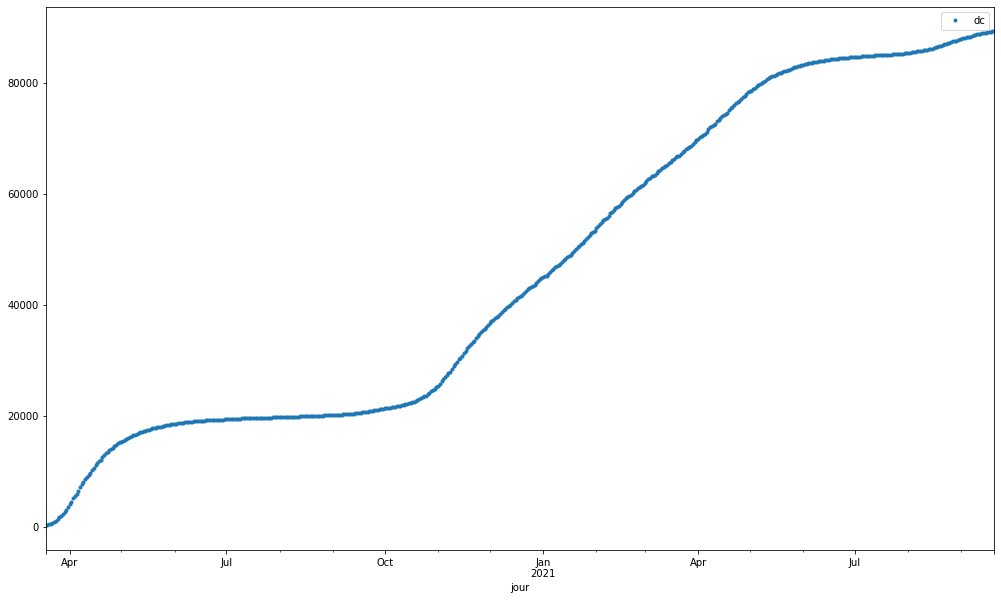

In [26]:
fig, ax = plt.subplots(figsize=(17,10))

data_sexe_all_fr['dc'].plot(ax=ax, linestyle='', marker='.')

plt.legend()